Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Summary statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  species_encoded  
count        150.000000       150.000000  
mean           0.458056         1.000000  
std            0.317599         0.819232  
min            0.000000         0.000000  
25%            0.083333         

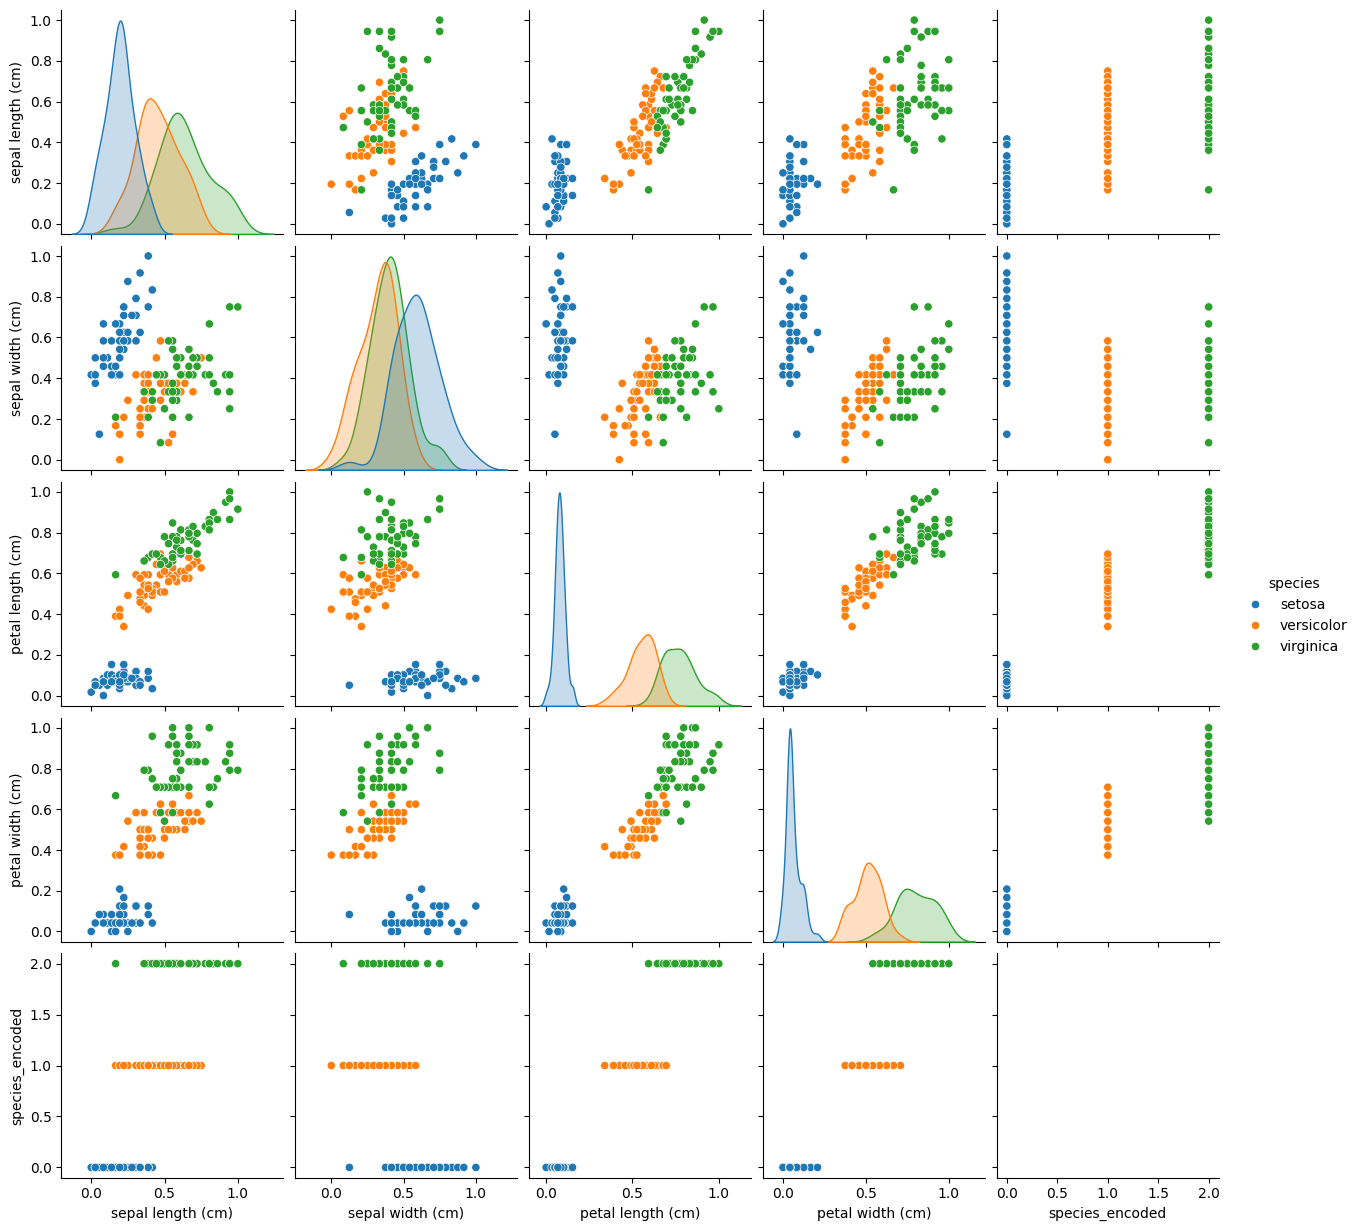

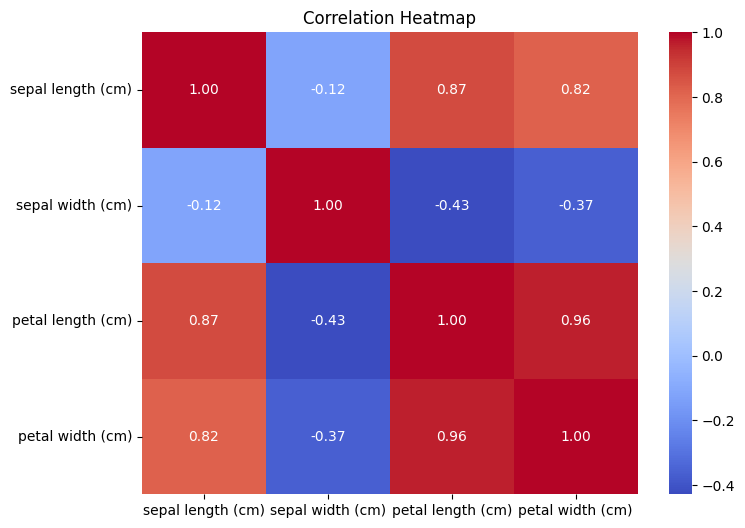

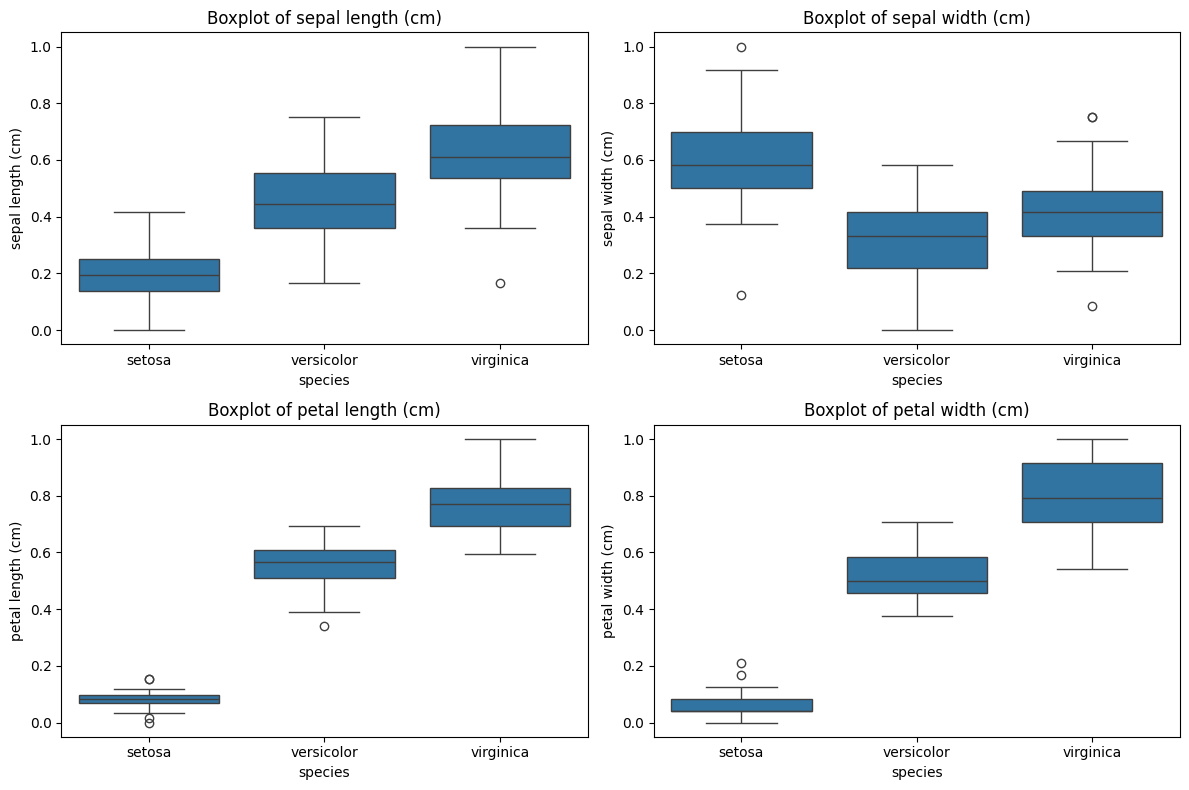


Train set size: 120, Test set size: 30


In [2]:
# preprocessing_iris.ipynb

# -----------------------------
# Section 1: Imports
# -----------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# -----------------------------
# Section 2: Load Dataset
# -----------------------------
# Option 1: Load Iris dataset from scikit-learn
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Option 2: Generate synthetic data (uncomment if needed)
# np.random.seed(42)
# cluster_means = [[5, 3.5, 1.4, 0.2], [6, 3, 4.5, 1.5], [6.5, 3, 5.5, 2]]
# cluster_std = [0.3, 0.4, 0.35]
# data = []
# labels = []
# for i, mean in enumerate(cluster_means):
#     samples = np.random.normal(loc=mean, scale=cluster_std[i], size=(50, 4))
#     data.append(samples)
#     labels += [iris.target_names[i]] * 50
# data = np.vstack(data)
# df = pd.DataFrame(data, columns=iris.feature_names)
# df['species'] = labels

# -----------------------------
# Section 3: Preprocessing
# -----------------------------
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Encode class label
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])

# -----------------------------
# Section 4: Data Exploration
# -----------------------------
# Summary statistics
print("\nSummary statistics:\n", df_scaled.describe())

# Pairplot
sns.pairplot(df_scaled, hue='species')
plt.savefig("pairplot_iris.png")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_scaled[iris.feature_names].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12,8))
for i, col in enumerate(iris.feature_names):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='species', y=col, data=df_scaled)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.savefig("boxplots_iris.png")
plt.show()

# -----------------------------
# Section 5: Train/Test Split Function
# -----------------------------
def split_data(df, test_size=0.2, random_state=42):
    X = df[iris.feature_names].values
    y = df['species_encoded'].values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test

# Example usage
X_train, X_test, y_train, y_test = split_data(df_scaled)
print(f"\nTrain set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")
